# 1.3.1: Modeling a Curve to Understand a System

<br>

---

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---


In the previous chapter, we noted that models serve three primary purposes: to describe a system, to predict the growth of a system, and to optimize a system.  In this chapter, we'll start with the first purpose. We're going to start with a set of data (world population growth since 1950) and try to build a model that matches the data.  In other words, we want to find the "set of rules" that governs the system.

<br>

But we'll have to start by learning how to import and look at data inside Colab.

---

## Importing Population Data into Colab

To *import* something into a coding environment like Colab means that you are making information or tools available for this particular notebook. The data on world population that we will use in this notebook in stored in a spreadsheet, so we'll need to use a Pandas library function to import that data.  The *function* is `read_excel()`, which can extract data from an excel spreadsheet and store it in a `DataFrame`, which is a Pandas data object.

<br>

Here's how that works:

In [ ]:
# Import Pandas and give it the shorthand name "pd"
import pandas as pd

# Define the file we want to import
address = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
file_loc = 'Images_and_Data/Data/World_pop_data.xlsx'

# Import the world population data
data = pd.read_excel(address + file_loc, header=0,index_col=0)

`data` is stored in a `DataFrame`, which is a data storage object that is made to store tables of data; it is similar to a Series, except that it can have multiple columns.  So much like a Series, `data` has an index, which in this case is a list of years from 1950 to 2016.  But it has two columns: one holds data that has been estimated by the U.S. Census Bureau, and one holds data gathered by the United Nations:

In [ ]:
data

,US_census,UN
Year,,
1950,2.557629,2.525149
1951,2.594940,2.572851
1952,2.636772,2.619292
1953,2.682053,2.665865
1954,2.730228,2.713172
...,...,...
2012,7.013871,7.080072
2013,7.092128,7.162119
2014,7.169968,7.243784


The values are in billions.  Now we can select a column from the `DataFrame` using the dot operator, which allows us to access just a portion of the table.  Here are the estimates from the United States Census Bureau:

In [ ]:
census = data.US_census

`census` is a new object that is a Series: every column of a DataFrame is a Series.  We can use `tail` to see the last few elements of the `Series`:

In [ ]:
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: US_census, dtype: float64

Here are the estimates from the United Nations:

In [ ]:
un = data.UN
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016    7.460021
Name: UN, dtype: float64

Now we can plot the estimates using the function `plot()` that is associated with Series.  Notice that we can plot both Series, and they appear on the same graph:

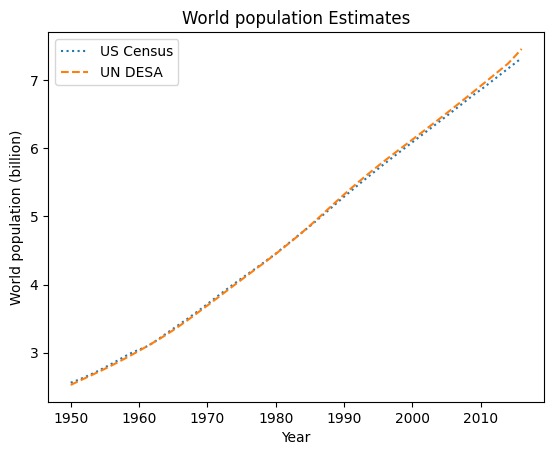

In [ ]:
census.plot(style=':', label='US Census',legend=True)
un.plot(style='--', label='UN DESA',xlabel='Year',
             ylabel='World population (billion)',
            title='World population Estimates',
           legend=True);


The lines overlap almost completely, but the most recent estimates diverge slightly.



---
<br>

🟨 🟨

In [ ]:
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('1_3_world_pop',home,0)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

What is the key difference between a DataFrame and a Series?

A) A DataFrame can hold a larger number of data points
B) A DataFrame is in the Numpy library, but a Series is in the Pandas library
C) A DataFrame can have multiple columns of data, while a Series can only have one
D) A DataFrame is the same as an excel spreadsheet, but a Series is a Python object


---

## Curve fitting as modeling

Now that we've imported the data, we want to try to understand it: we need this understanding in order to decide what kind of model we'll use to predict future growth.  In other words, we need to know the 'rules' that population growth follows.

<br>

Curve fitting is one way we can do this.  When we fit a curve, we are trying to determine the mathematical function (that is, the 'rule') that best represents the data.

### Using curve fitting to find a parameter

Sometimes we know the form of the equation (linear, exponential, etc...), and curve fitting allows us to understand a key parameter of the system.

<br>

For instance, let's imagine that we collected the following data points describing our distance from Augie as a function of time on a trip to Chicago:

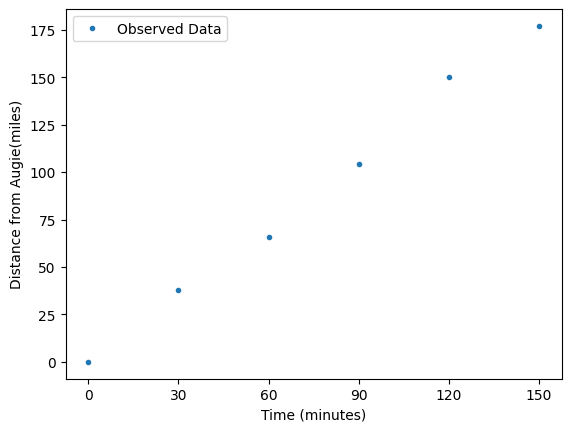

In [ ]:
# Enter the known data as a dictionary
position_vs_time = {'0':0,'30':38,'60':66,'90':104,'120':150,'150':177}

# Convert the data into a Series
chicago_trip = pd.Series(position_vs_time,name="Trip to Chicago")

# Plot the data
chicago_trip.plot(style='.',xlabel='Time (minutes)',
        ylabel='Distance from Augie(miles)', label='Observed Data',legend='True');

This is a case where we know what the curve should look like: that is, we know how that particular system behaves.  If we assume a constant velocity, we have a kinematic equation $x = vt$ that says that the distance traveled $x$ is equal to the velocity times the times.  

<br>

Since this is a linear equation, we want to fit a linear plot to the data. We'll use a for loop to create a straight line with a slope of the velocity:

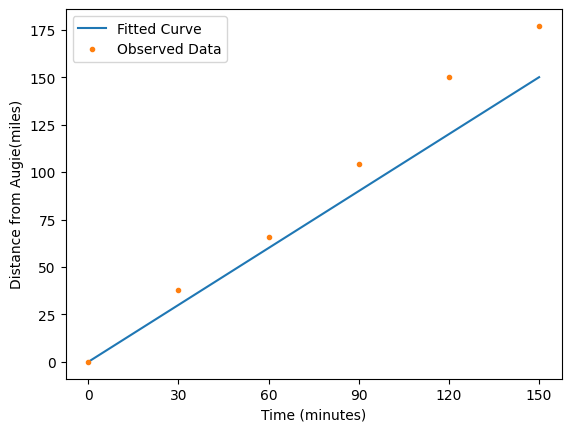

In [ ]:
# Create an empty Series to hold our line data
line = pd.Series([], dtype = object)

# Guess at an average velocity
vel = 60    # mph

# Define the time of each time step
tstep = 0.5 # hours

# Populate the Series to describe the line
for i in range(6):
    line[i] = vel*(i)*tstep

# Plot the line with observed data
line.plot(label='Fitted Curve',legend='True')
chicago_trip.plot(style='.',xlabel='Time (minutes)',
        ylabel='Distance from Augie(miles)', label='Observed Data',legend='True');

Our curve doesn't quite fit, but it's not because the form of the equation ('the rule') is wrong: instead, our main parameter is a bit off.  Fortunately, we can use the plot to find a pretty good approximation: adjust `vel` in the cell above until we get a good fit with the data.

<br>

In this way we have discovered a key parameter that describes the data set: the average velocity.

---
<br>

🟨 🟨

In [ ]:
#@title {form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_Quant('1_3_world_pop',home,1)
answer = None #@param {type:"number"}
check_Quant(data,answer)

What is the approximate average velocity of the car?



---

### Using curve fitting to find a governing equation

In other situations, though, like world population, we don't know the rules.  So we use curve fitting to help us find the rules: if we can find a curve that matches the data, then we start to better understand the system!

<br>

As usual, we'll start simple and add complexity as we go.  Although there is some curvature in the plotted estimates, it looks like world population growth has been close to linear since 1960 or so.  So we'll start with the assumption that the data behaves in a linear fashion.

<br>

To fit the model to the data, we'll compute the average annual growth
from 1950 to 2016: this will be the slope of our line. Since the UN and Census data are so close, we'll use the Census data.
We can select a value from a `Series` using the bracket operator:

In [ ]:
census[1950]

2.557628654

So we can get the total growth during the interval like this:

In [ ]:
total_growth = census[2016] - census[1950]
total_growth

4.768368055

In this example, the labels `2016` and `1950` are part of the data, so it
would be better not to make them part of the program.
Putting values like these in the program is called *hard coding*; it is considered bad practice because if the data change in the future, we have to change the program.

<br>

It would be better to get the labels from the `Series`.
We can do that by selecting the index from `census` (using the dot operator) and then selecting the first element from the index:

In [ ]:
t_0 = census.index[0]
t_0

1950

So `t_0` is the label of the first element, which is 1950.
We can get the label of the last element like this.

In [ ]:
t_end = census.index[-1]
t_end

2016

The value `-1` indicates the last element; `-2` indicates the second to last element, and so on.  The difference between `t_0` and `t_end` is the elapsed time between them.

In [ ]:
elapsed_time = t_end - t_0
elapsed_time

66

Now we can use `t_0` and `t_end` to select the population at the beginning and end of the interval.

In [ ]:
p_0 = census[t_0]
p_end = census[t_end]

And compute the total growth during the interval.

In [ ]:
total_growth = p_end - p_0
total_growth

4.768368055

Finally, we can compute average annual growth.

In [ ]:
annual_growth = total_growth / elapsed_time
annual_growth

0.07224800083333333

From 1950 to 2016, world population grew by about 0.07 billion people per year, on average.  This will be the slope of our line.

<br>

Now we want to create a new `Series` that stores our linear model--this will be our fitted linear curve, and we can then compare it to our data.  We'll start with `p_0`,
and then add `annual_growth` each year. To store the results, we'll use a
`Series` object:

In [ ]:
results = pd.Series([],dtype=object)
results.name = 'Population'
results.index.name = 'Year'

We can set the first value in the new `Series` like this.

In [ ]:
results[t_0] = p_0

Here's what it looks like so far.

In [ ]:
results

Year
1950    2.557629
Name: Population, dtype: float64

Just as we did with our Chicago line, we can set the rest of the values by simulating annual growth.  The `change_func` here is simply adding the annual growth every year.  For this reason, this linear model is sometimes called a *constant growth model*.

In [ ]:
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

Notice:

* We're using `range` in a slightly more complex way!  In this use, the values of `t` go from from `t_0` to `t_end`; but while the first value is include (`t_0`) in the loop, the last one (`t_end`) is not.

* Inside the loop, we compute the population for the next year by adding the population for the current year and `annual_growth`.

* Since `t_end = 2016`, in the last time through the loop, the value of `t` is 2015, so the last label in `results` is 2016.

Here's what the results look like, compared to the estimates.

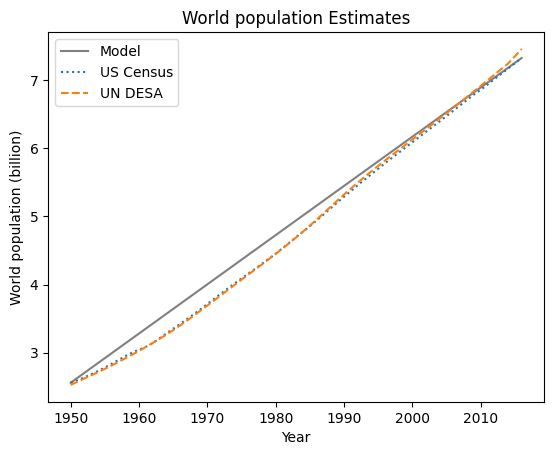

In [ ]:
# Plot fitted line
results.plot(color='gray', label='Model',title='Constant Growth Model',
            legend=True)

# Plot known data
census.plot(style=':', label='US Census',legend=True)
un.plot(style='--', label='UN DESA',xlabel='Year',
             ylabel='World population (billion)',
            title='World population Estimates',
           legend=True);

From 1950 to 1990, the model does not fit the data particularly well, but after that, it's OK.

---
<br>

🟨 🟨

In [ ]:

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('1_3_world_pop',home,2)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

Is the average growth between 1970 and 2016 in the known data higher or lower than the average growth we calculated?

A) Higher
B) About the same
C) Lower


---
<br>

🟨 🟨

In [ ]:

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('1_3_world_pop',home,3)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

If a line of code reads 'for x in range(10,15), what are the smallest and largest values of 'x' in the loop?

A) Smallest: 0; Largest: 15
B) Smallest: 11; Largest: 15
C) Smallest: 10; Largest: 14
D) Smallest: 10; Largest: 15
E) Smallest: 0; Largest: 14


---